In [2]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
#import sklearn
#from sklearn import linear_model
#from sklearn.cross_validation import train_test_split
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

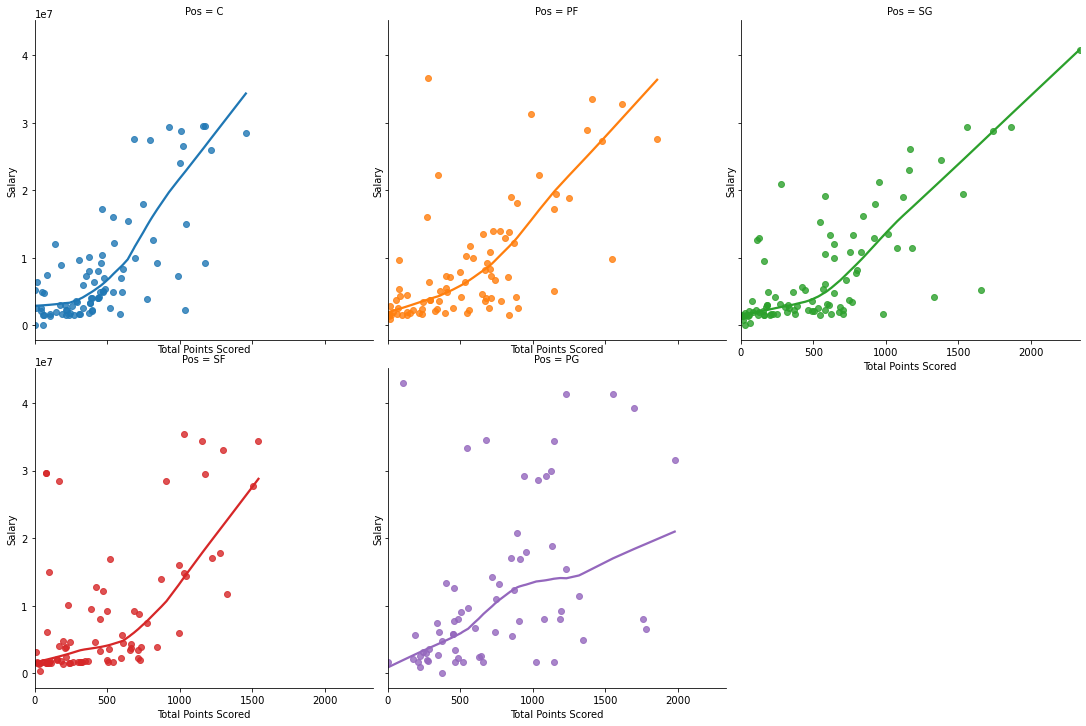

In [34]:
#EDA#
# Salary and PTS by Position #
sns.lmplot(x="PTS", y="Salary",hue="Pos",col="Pos",col_wrap=3, 
           data=final_data_p,lowess=True).set(
    xlabel='Total Points Scored', 
    ylabel='Salary')
plt.savefig('position.png', dpi=300, bbox_inches='tight')

In [39]:
#sns.pairplot(final_data, height=1.2, aspect=1.5)

In [40]:
#sns.heatmap(final_data.corr)

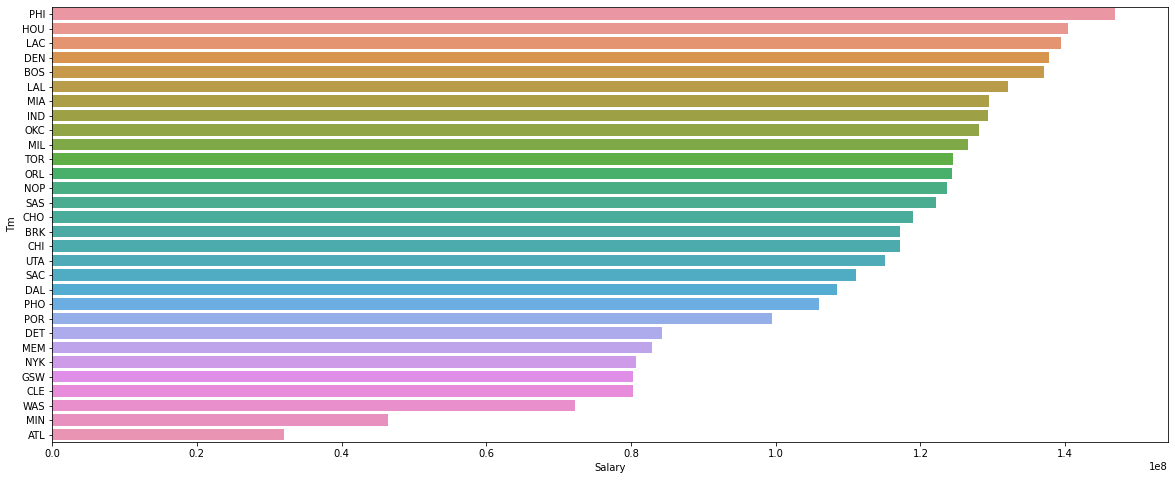

In [63]:
#Salary by Team#
Salary_df = final_data[final_data['Tm'] != 'TOT'].groupby("Tm").agg(np.sum).sort_values('Salary', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x=Salary_df.Salary, y=Salary_df.Tm, ax=ax)
plt.show()

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


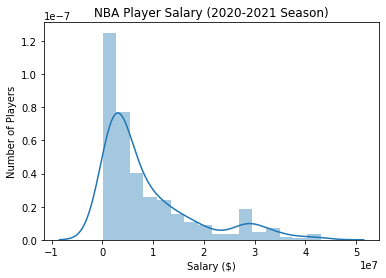

In [41]:
#Checking distribution of Salary#
s = final_data.Salary
ax = sns.distplot(s);
ax.set(xlabel='Salary ($)', ylabel='Number of Players', title='NBA Player Salary (2020-2021 Season)')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


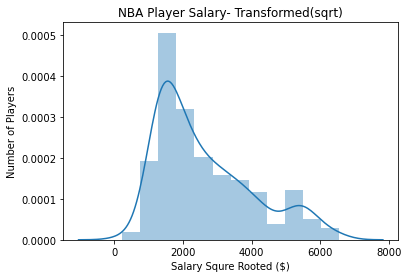

In [43]:
# Target variable: right skewed#
# Transforming Target variable using sqrt #
b = sns.distplot(np.sqrt(s))
b.set(xlabel='Salary Squre Rooted ($)', ylabel='Number of Players', title='NBA Player Salary- Transformed(sqrt)')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='Salary'>

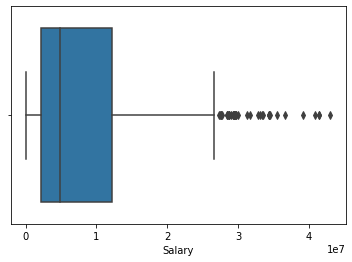

In [44]:
sns.boxplot(x=final_data['Salary'])

In [45]:
final_data['Salary_t']=np.sqrt(final_data.Salary)
final_data

<ipython-input-45-d20bf4a1b966>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Salary_t']=np.sqrt(final_data.Salary)


,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,Salary,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Salary_t
0,Steven Adams,26.0,OKC,63.0,63.0,1680.0,283.0,478.0,0.592,1.0,...,67.0,94.0,122.0,684.0,27528090.0,0,0,0,0,5246.721680
1,Bam Adebayo,22.0,MIA,72.0,72.0,2417.0,440.0,790.0,0.557,2.0,...,93.0,204.0,182.0,1146.0,5115492.0,1,0,0,0,2261.745361
2,LaMarcus Aldridge,34.0,SAS,53.0,53.0,1754.0,391.0,793.0,0.493,61.0,...,87.0,74.0,128.0,1001.0,24000000.0,0,0,0,0,4898.979492
4,Nickeil Alexander-Walker,21.0,NOP,47.0,1.0,591.0,98.0,266.0,0.368,46.0,...,8.0,54.0,57.0,267.0,3113160.0,0,0,0,1,1764.414917
5,Grayson Allen,24.0,MEM,38.0,0.0,718.0,117.0,251.0,0.466,57.0,...,2.0,33.0,53.0,330.0,2545320.0,0,0,0,1,1595.405884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Delon Wright,27.0,DAL,73.0,5.0,1570.0,190.0,411.0,0.462,47.0,...,22.0,73.0,93.0,504.0,9000000.0,0,1,0,0,3000.000000
530,Thaddeus Young,31.0,CHI,64.0,16.0,1591.0,269.0,601.0,0.448,79.0,...,23.0,102.0,134.0,659.0,13545000.0,1,0,0,0,3680.353271
531,Trae Young,21.0,ATL,60.0,60.0,2120.0,546.0,1249.0,0.437,205.0,...,8.0,289.0,104.0,1778.0,6571800.0,0,1,0,0,2563.552246
532,Cody Zeller,27.0,CHO,58.0,39.0,1341.0,251.0,479.0,0.524,18.0,...,25.0,75.0,140.0,642.0,15415730.0,0,0,0,0,3926.287109


In [46]:

cor=final_data.corr()['Salary_t']
cor

Age         0.341565
G           0.293146
GS          0.565758
MP          0.558877
FG          0.651945
FGA         0.646581
FG%         0.062837
3P          0.454923
3PA         0.472903
3P%         0.119681
2P          0.606469
2PA         0.619136
2P%         0.021260
eFG%        0.080106
FT          0.614969
FTA         0.612488
FT%         0.204931
ORB         0.298663
DRB         0.544416
TRB         0.500418
AST         0.558401
STL         0.506796
BLK         0.269750
TOV         0.620594
PF          0.409870
PTS         0.658563
Salary      0.977201
Pos_PF      0.006076
Pos_PG      0.154383
Pos_SF     -0.037471
Pos_SG     -0.086550
Salary_t    1.000000
Name: Salary_t, dtype: float64

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


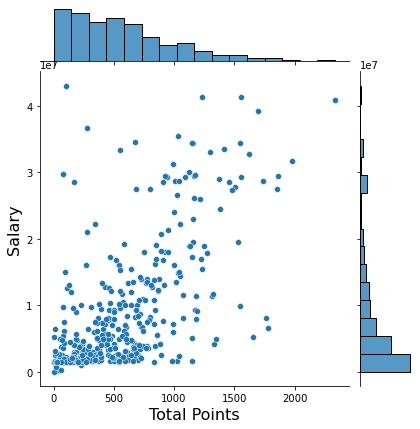

In [55]:
a = sns.jointplot(final_data.PTS, final_data.Salary)

a.set_axis_labels('Total Points', 'Salary', fontsize=16)

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


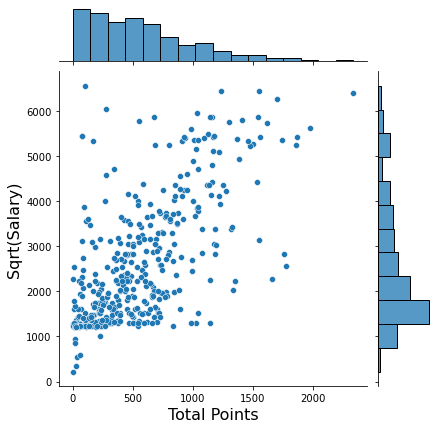

In [54]:
b = sns.jointplot(final_data.PTS, final_data.Salary_t)

b.set_axis_labels('Total Points', 'Sqrt(Salary)', fontsize=16)

In [47]:
type(cor)

pandas.core.series.Series

In [ ]:
# top 5 correlation #
#1 PTS 0.635
#2 FG 0.623
#3 FGA 0.616
#4 FT 0.618
#5 FTA 0.611

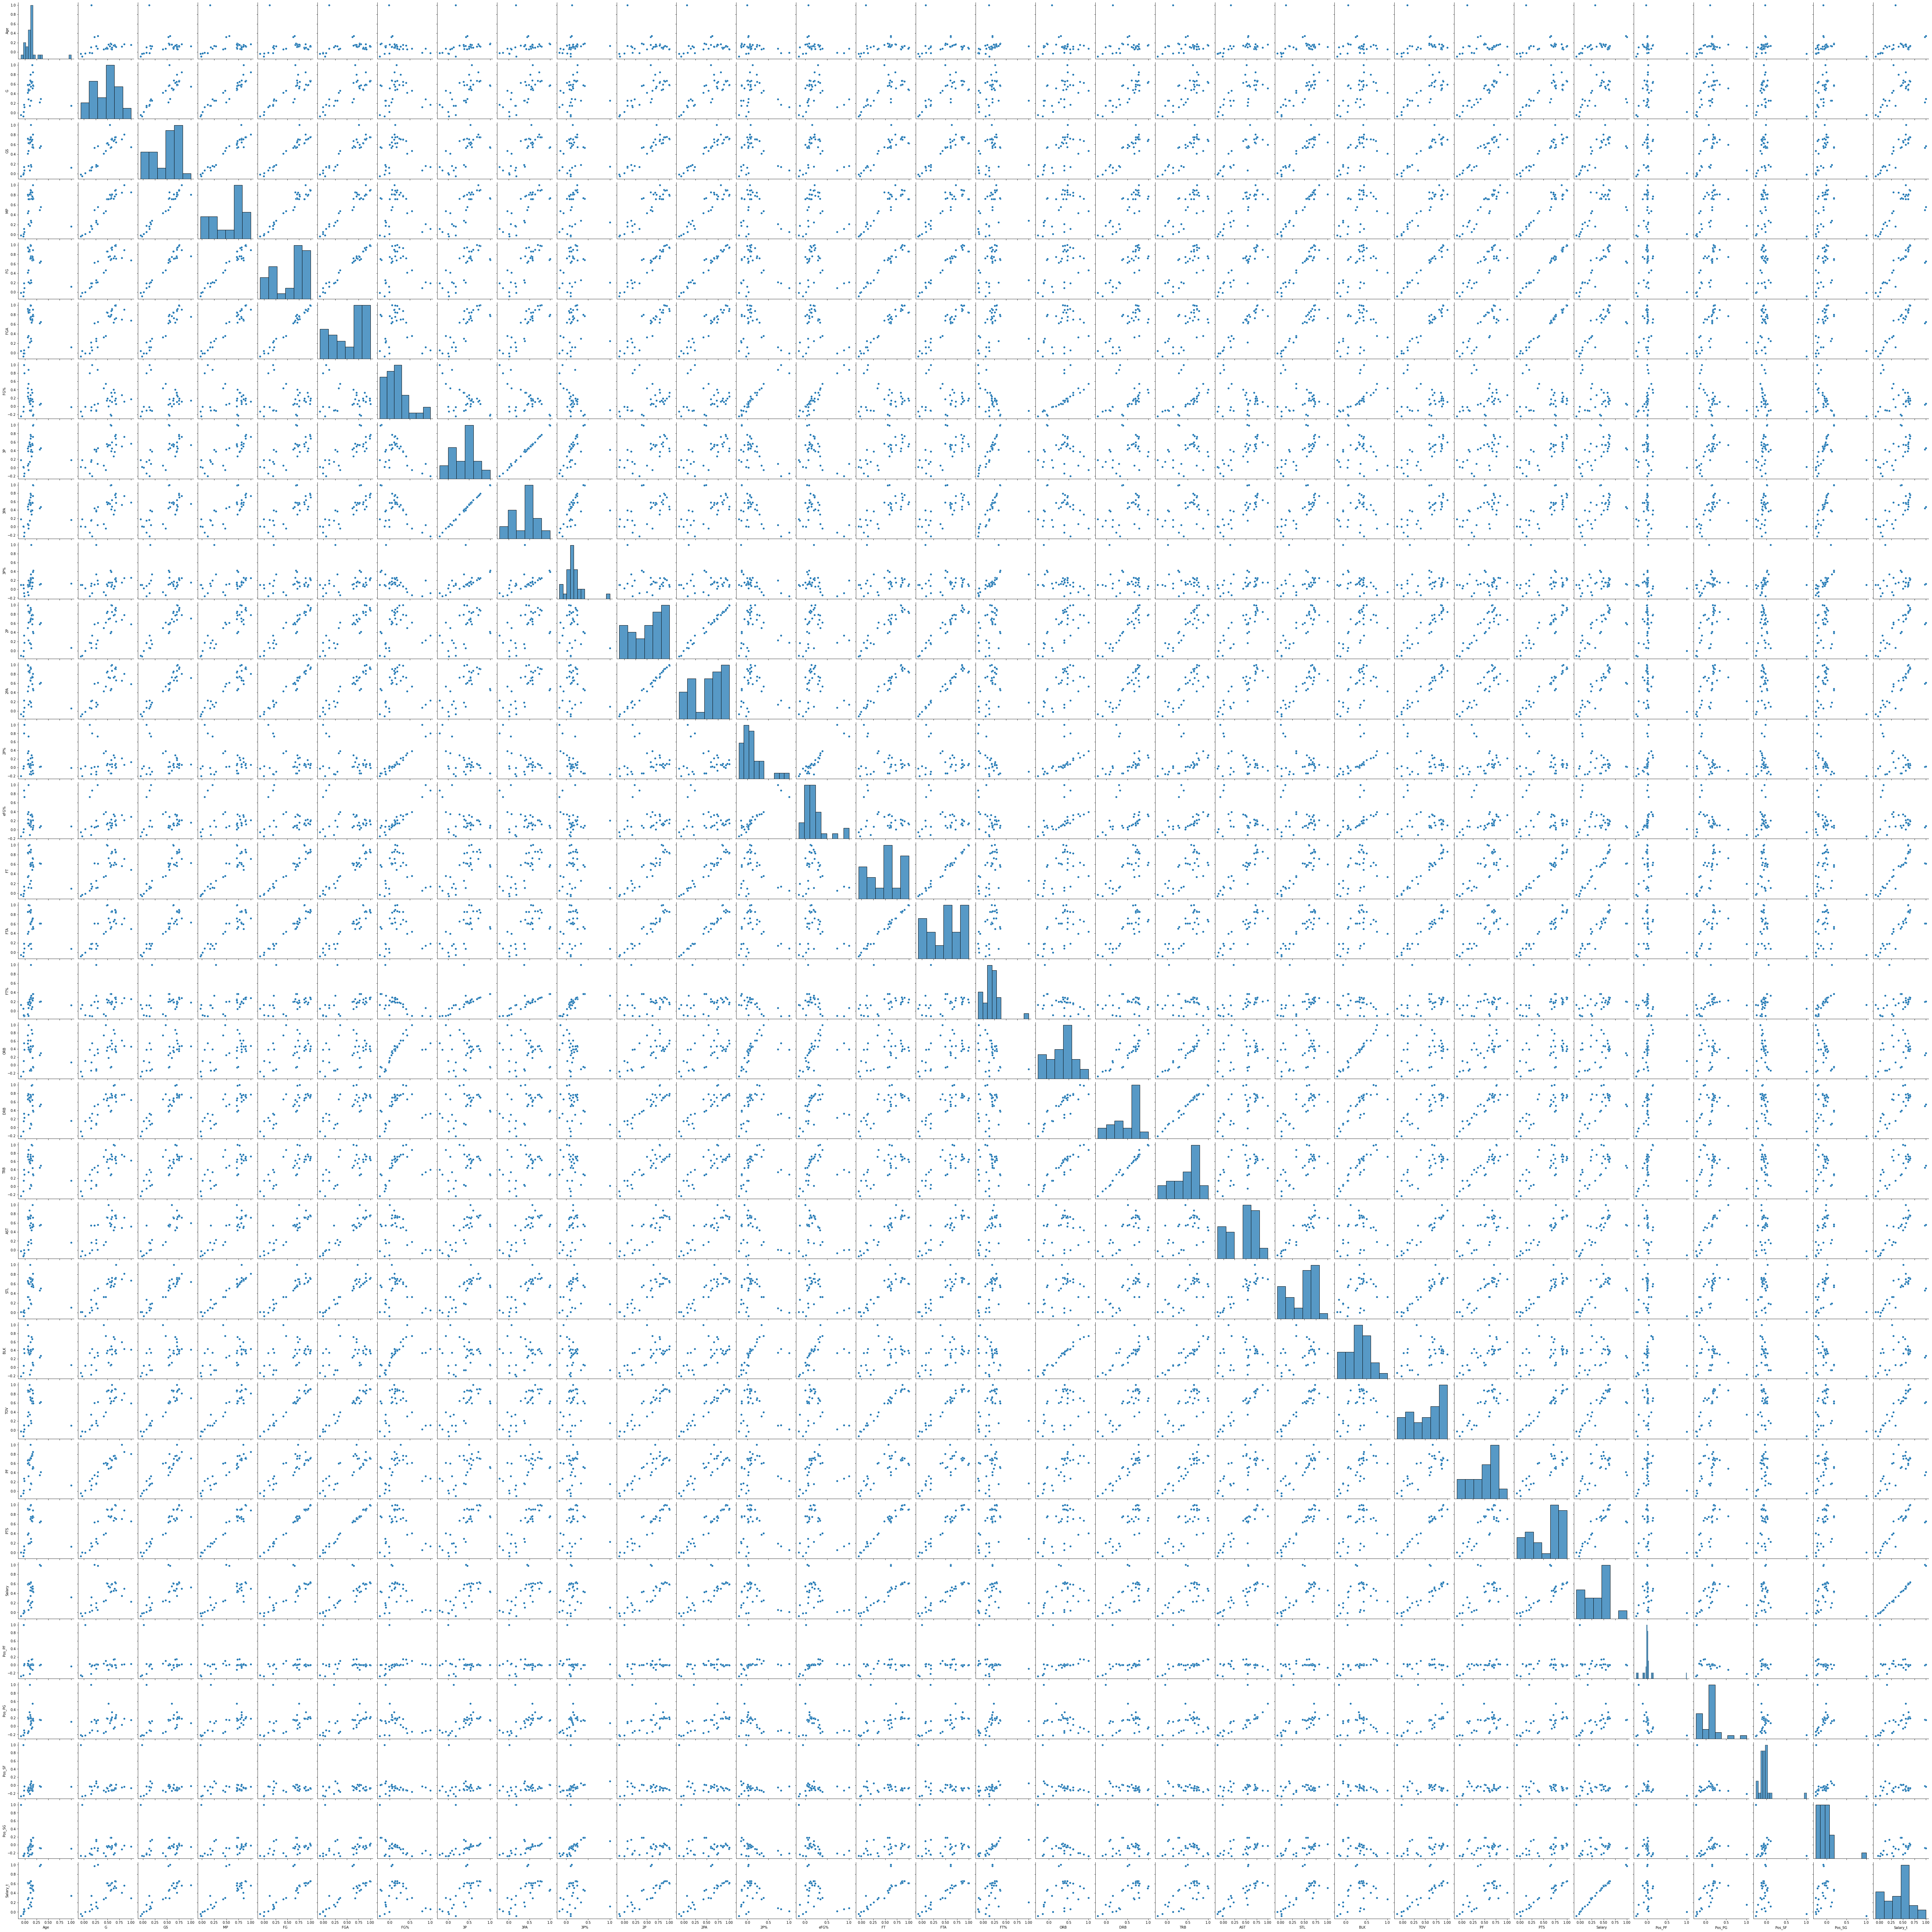

In [49]:
#check pair plot#
sns.pairplot(final_data.corr())


In [ ]:
#sns.heatmap(final_data.corr, cmap="seismic", annot=True, vmin=-1, vmax=1);

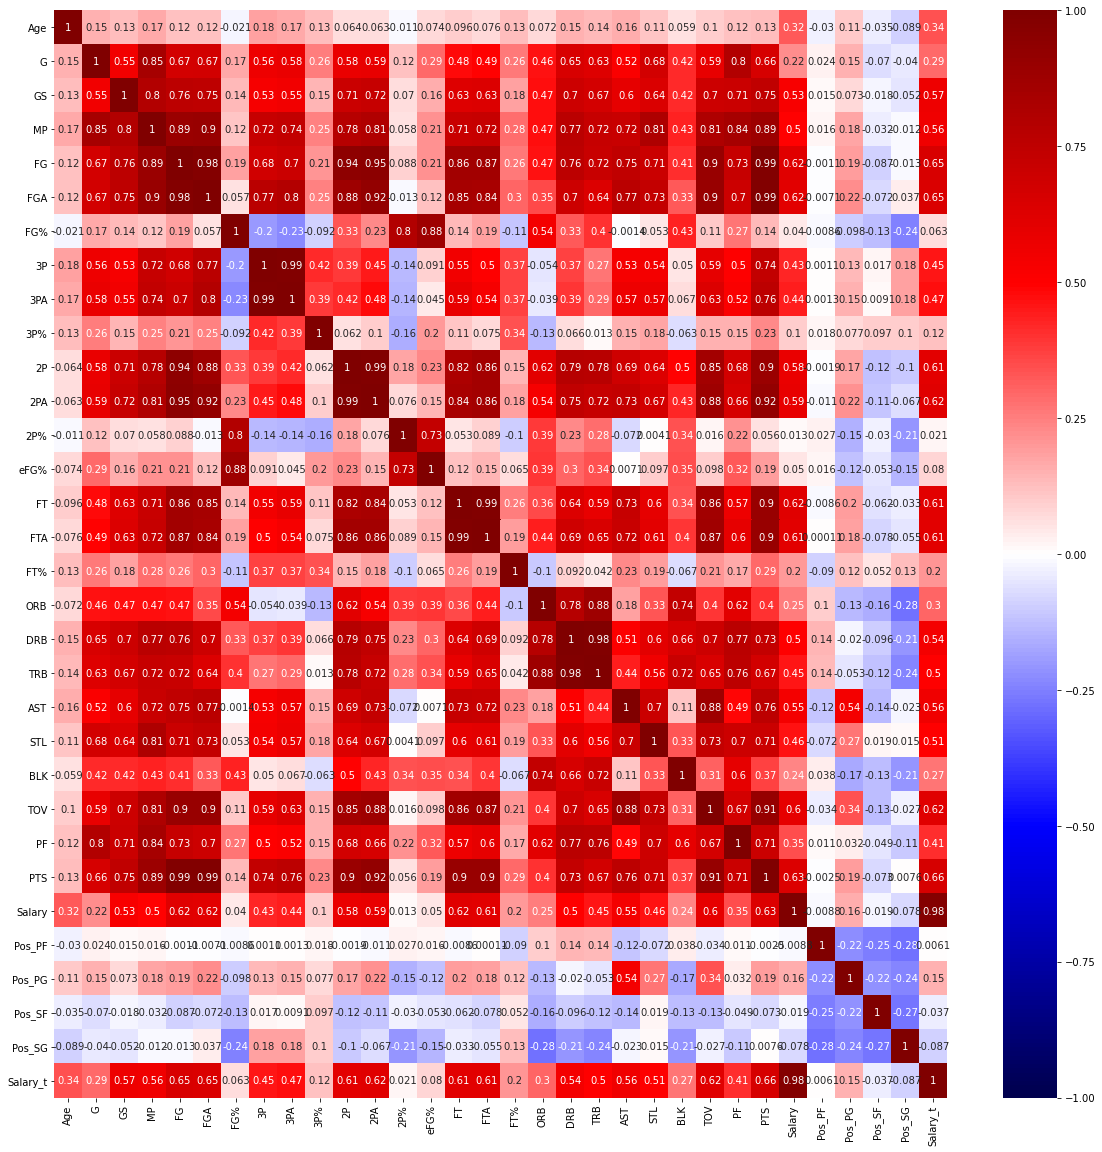

In [50]:
#Checking Multicollinearity#

final_data.corr()
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(final_data.corr(),cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [107]:
### Linear Regression Model ##
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

from sklearn import metrics

In [121]:
# Train Test Split#

X,y=final_data.drop(['Salary','Player','Salary_t'],axis=1),final_data['Salary_t']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=3)

In [122]:
selected_columns1 = ['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%',
                   'FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'
                   ]

In [123]:
y=y_train
X=X_train[['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%',
           'FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']]

y_test=y_test
X_test=X_test[['Age','G','GS','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']]

In [124]:
## regression fit ##
## Cross validation k = 5##

lm = LinearRegression()
lm.fit(X, y)

train_r2=lm.score(X,y)
test_r2=lm.score(X_test,y_test)

lm_score=cross_val_score(lm,X,y,cv=5)
print(np.mean(lm_score))

print(train_r2)
print(test_r2)



0.4933551453348194
0.6133578473377754
0.4904785151625196


In [125]:
# Training R^2 > Testing R^2,Overfitting #

In [126]:
# Testing Lasso with different alpha#
lasso_model = Lasso(alpha = 100) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X, y)

list(zip(selected_columns1, lasso_model.coef_))

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17872384.0, tolerance: 61998.7109375
  model = cd_fast.enet_coordinate_descent(


[('Age', 69.88102),
 ('G', -23.452835),
 ('GS', 8.27324),
 ('MP', -0.27290204),
 ('FG', 1.8342115),
 ('FGA', 0.6750074),
 ('FG%', 0.0),
 ('3P', 0.0),
 ('3PA', 2.004392),
 ('3P%', 0.0),
 ('2P', 0.5134044),
 ('2PA', -0.0),
 ('2P%', 0.0),
 ('eFG%', 0.0),
 ('FT', 1.3730363),
 ('FTA', -0.06154234),
 ('FT%', 0.0),
 ('ORB', 3.8891432),
 ('DRB', -0.0),
 ('TRB', 0.60818636),
 ('AST', 2.7343836),
 ('STL', 9.069563),
 ('BLK', 1.7749789),
 ('TOV', -5.784021),
 ('PF', -2.5866635),
 ('PTS', 0.38737783)]

In [127]:
# Running Ridge with different alpha#
lr_model_ridge = Ridge(alpha = 1000000000000)
lr_model_ridge.fit(X, y)

list(zip(selected_columns1, lr_model_ridge.coef_))

[('Age', 5.790686e-07),
 ('G', 2.69062e-06),
 ('GS', 6.6646426e-06),
 ('MP', 0.0001744736),
 ('FG', 4.581254e-05),
 ('FGA', 9.679437e-05),
 ('FG%', 2.2863935e-09),
 ('3P', 1.2103921e-05),
 ('3PA', 3.2396925e-05),
 ('3P%', 9.261495e-09),
 ('2P', 3.3708628e-05),
 ('2PA', 6.439743e-05),
 ('2P%', 4.9817295e-10),
 ('eFG%', 2.9137155e-09),
 ('FT', 2.499924e-05),
 ('FTA', 3.042866e-05),
 ('FT%', 1.690858e-08),
 ('ORB', 5.6537947e-06),
 ('DRB', 2.9725394e-05),
 ('TRB', 3.5379187e-05),
 ('AST', 3.083537e-05),
 ('STL', 5.875653e-06),
 ('BLK', 2.880012e-06),
 ('TOV', 1.48931895e-05),
 ('PF', 1.0008826e-05),
 ('PTS', 0.00012872824)]

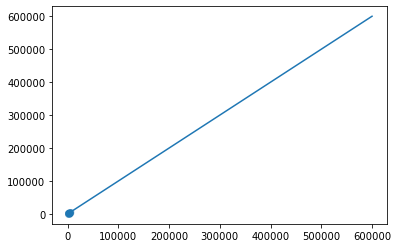

In [128]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns1])
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [129]:
test_set_pred

array([2961.0352 , 2428.208  , 1736.3556 , 1846.3832 , 2211.1309 ,
       1534.7207 , 3790.2598 , 3115.5596 , 4317.099  , 2991.9348 ,
       2471.5151 , 3247.196  , 2515.835  , 2722.3354 , 2919.5842 ,
       1690.2156 , 3496.1536 , 3178.3542 , 2427.6477 , 3052.478  ,
       1843.7177 , 4083.7366 , 2509.787  , 3891.7354 , 1675.4261 ,
       2935.1885 , 1571.2703 , 3148.0835 , 3743.5085 , 1702.2498 ,
       3293.5547 ,  988.94977, 3336.4485 , 2854.4783 , 2844.9167 ,
       2521.7    , 1609.5299 , 3407.441  , 4020.2605 , 2388.2178 ,
       4443.345  , 1515.3296 , 2621.9685 , 1312.0676 , 3874.081  ,
       3570.8438 , 2382.5679 , 5567.654  , 3493.4246 , 3675.3694 ,
       1740.8689 , 1383.1545 , 1986.8055 , 1758.735  , 2932.3118 ,
       2684.5808 , 5242.846  , 1384.7144 , 4058.9727 , 1770.4047 ,
        831.097  , 3731.295  , 1562.1844 , 1440.4523 , 4144.055  ,
       1690.5723 , 1311.9917 , 7460.6665 , 2396.9922 , 2690.5347 ,
       2500.2732 , 1564.7798 , 3544.1877 , 2388.6807 , 2681.04

In [130]:
# Lasso R^2#
r2_score(y_test, test_set_pred)
# Improved a bit, but not a lot #

0.4901587124267972

In [131]:
#Lasso - Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

779.8338012695312

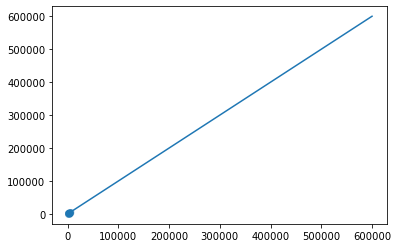

In [132]:
test_set_pred2 = lr_model_ridge.predict(X_test.loc[:,selected_columns1])
plt.scatter(test_set_pred, y_test, alpha=.1)
plt.plot(np.linspace(0,600000,1000), np.linspace(0,600000,1000))

In [133]:
# Ridge R^2#
r2_score(y_test, test_set_pred2)
# Not useful at all #

-0.0005407210909822435

In [134]:
#Ridge - Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred2)

# Ridge is not useful in this case #

1216.829345703125

In [135]:
## Preparing Lasso CV - to trim features and reduce overfit#

## Scale the data as before
std = StandardScaler()
std.fit(X.values)

StandardScaler()

In [136]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X.values)
X_te = std.transform(X_test.values)
X_tr

array([[ 2.031376  ,  1.1489956 ,  1.8908303 , ...,  0.09833217,
         2.255521  , -0.11823745],
       [ 0.31228614, -2.1739855 , -0.99156463, ..., -1.1970798 ,
        -1.5702311 , -1.2358668 ],
       [-0.4244666 , -0.6635395 , -0.43109894, ..., -0.9905648 ,
        -0.8156101 , -0.79165053],
       ...,
       [-0.4244666 , -0.05936114, -0.87146485, ..., -0.42734227,
        -0.39442644, -0.7373049 ],
       [ 1.7857916 , -0.05936114, -0.83143157, ..., -0.46489045,
        -0.20138389, -0.22929154],
       [ 0.31228614,  0.79655826,  1.5705642 , ..., -0.23960139,
         2.0800278 ,  0.1204107 ]], dtype=float32)

In [137]:
1000**np.linspace(-2,2,2000)

array([1.00000000e-06, 1.01391839e-06, 1.02803051e-06, ...,
       9.72733778e+05, 9.86272669e+05, 1.00000000e+06])

In [138]:
alphavec =10**np.linspace(-2,2,200)

# Lasso CV with k=5 #
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr, y)

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4112448.75, tolerance: 53712.58203125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6487634.0, tolerance: 53712.58203125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8073200.0, tolerance: 53712.58203125
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descen

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364861.46875, tolerance: 50431.99609375
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1460775.625, tolerance: 50431.99609375
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2785193.0, tolerance: 50431.99609375
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_de

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1646914.875, tolerance: 49705.97265625
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34314896.0, tolerance: 49705.97265625
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2917737.75, tolerance: 49705.97265625
  model = cd_fast.enet_coordinate_descent_gram(
/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_des

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [139]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_
lasso_model

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [140]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
list(zip(X.columns, lasso_model.coef_))

[('Age', 300.13605),
 ('G', -430.89774),
 ('GS', 188.21046),
 ('MP', 0.0),
 ('FG', 16.073132),
 ('FGA', 67.26433),
 ('FG%', 0.0),
 ('3P', 0.0),
 ('3PA', 49.652527),
 ('3P%', 0.0),
 ('2P', 0.0),
 ('2PA', 0.0),
 ('2P%', 1.8169338),
 ('eFG%', 0.0),
 ('FT', 0.0),
 ('FTA', 0.0),
 ('FT%', 57.589733),
 ('ORB', 33.891136),
 ('DRB', 0.0),
 ('TRB', 80.267),
 ('AST', 145.04466),
 ('STL', 151.74875),
 ('BLK', 27.32624),
 ('TOV', 0.0),
 ('PF', -52.387703),
 ('PTS', 625.29346)]

In [141]:
final_data

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,Salary,Pos_PF,Pos_PG,Pos_SF,Pos_SG,Salary_t
0,Steven Adams,26.0,OKC,63.0,63.0,1680.0,283.0,478.0,0.592,1.0,...,67.0,94.0,122.0,684.0,27528090.0,0,0,0,0,5246.721680
1,Bam Adebayo,22.0,MIA,72.0,72.0,2417.0,440.0,790.0,0.557,2.0,...,93.0,204.0,182.0,1146.0,5115492.0,1,0,0,0,2261.745361
2,LaMarcus Aldridge,34.0,SAS,53.0,53.0,1754.0,391.0,793.0,0.493,61.0,...,87.0,74.0,128.0,1001.0,24000000.0,0,0,0,0,4898.979492
4,Nickeil Alexander-Walker,21.0,NOP,47.0,1.0,591.0,98.0,266.0,0.368,46.0,...,8.0,54.0,57.0,267.0,3113160.0,0,0,0,1,1764.414917
5,Grayson Allen,24.0,MEM,38.0,0.0,718.0,117.0,251.0,0.466,57.0,...,2.0,33.0,53.0,330.0,2545320.0,0,0,0,1,1595.405884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,Delon Wright,27.0,DAL,73.0,5.0,1570.0,190.0,411.0,0.462,47.0,...,22.0,73.0,93.0,504.0,9000000.0,0,1,0,0,3000.000000
530,Thaddeus Young,31.0,CHI,64.0,16.0,1591.0,269.0,601.0,0.448,79.0,...,23.0,102.0,134.0,659.0,13545000.0,1,0,0,0,3680.353271
531,Trae Young,21.0,ATL,60.0,60.0,2120.0,546.0,1249.0,0.437,205.0,...,8.0,289.0,104.0,1778.0,6571800.0,0,1,0,0,2563.552246
532,Cody Zeller,27.0,CHO,58.0,39.0,1341.0,251.0,479.0,0.524,18.0,...,25.0,75.0,140.0,642.0,15415730.0,0,0,0,0,3926.287109


In [142]:
# Make predictions on the test set using the new model
test_set_pred = lasso_model.predict(X_te)
#final_data['y_pred']=lasso_model.predict(final_data['Age','G','GS','FGA','3P','3P%','2P%','FT%','DRB','AST','STL','BLK','PF','PTS'])

In [143]:
# Find the MAE and R^2 on the test set using this model
mae(y_test, test_set_pred)

768.7953491210938

In [144]:
r2_score(y_test, test_set_pred)

0.5109014147063202

In [145]:
## Residual Plot ##

from math import sqrt



Text(0, 0.5, 'Residuals')

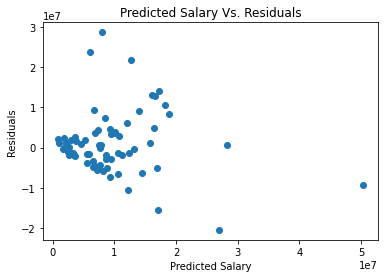

In [146]:
test_set_pred
lasso_resid=(y_test**2)-(test_set_pred**2)
plt.scatter((test_set_pred**2), lasso_resid)
plt.title("Predicted Salary Vs. Residuals")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")


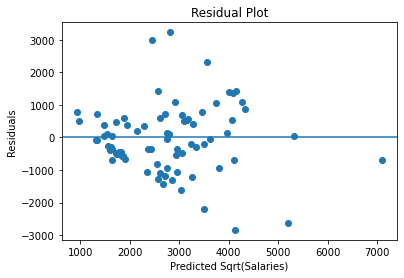

In [147]:
lasso_resid = (y_test) - (test_set_pred)

plt.scatter((test_set_pred), lasso_resid)

plt.title("Residual Plot")
plt.xlabel("Predicted Sqrt(Salaries)")
plt.ylabel("Residuals")

plt.axhline(0)


plt.savefig('Residual.png')

In [148]:
test_set_pred

array([3086.087 , 2369.6216, 1716.6843, 1935.5503, 2140.146 , 1617.9854,
       3795.558 , 3036.5703, 4061.4387, 3061.241 , 2756.6284, 3147.075 ,
       2671.2139, 2791.4597, 2959.7878, 1639.4474, 3501.7068, 2939.9077,
       2418.9243, 3167.8572, 1893.6481, 4108.133 , 2579.471 , 4006.8315,
       1723.6415, 2708.731 , 1644.6465, 2923.4568, 3461.4995, 1882.5684,
       3508.9863,  981.6666, 3255.306 , 2848.5835, 2814.0354, 2607.8977,
       1786.685 , 3240.9712, 4077.459 , 2280.7786, 4132.826 , 1347.5449,
       2745.6487, 1339.1636, 3967.6167, 3347.5486, 2444.969 , 5309.093 ,
       3269.31  , 3738.3618, 1850.9545, 1539.0183, 1857.9056, 1813.3489,
       3059.5593, 2547.666 , 5198.5225, 1475.5723, 4152.913 , 1724.9707,
        940.2478, 3620.5718, 1607.7786, 1558.98  , 4337.2065, 1742.2922,
       1318.7194, 7087.0254, 2607.1882, 2721.5122, 2347.6357, 1634.581 ,
       3565.28  , 2564.6638, 2759.8909, 4273.5713, 1475.4385, 1824.509 ,
       2944.314 , 1750.9979, 1596.6184], dtype=floa

/Users/jayz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


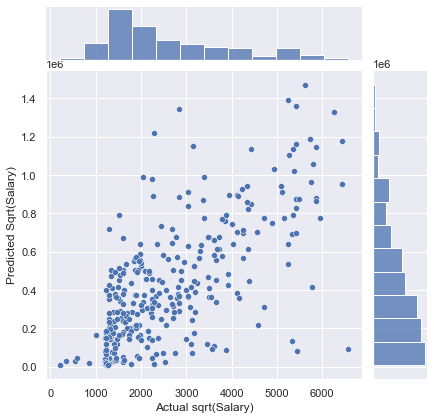

In [149]:
import scipy.stats as stats
salary_train_pred = lasso_model.predict(X)
sns.set(style="darkgrid", color_codes=True)
z = sns.jointplot(y, salary_train_pred)
z.set_axis_labels('Actual sqrt(Salary)', 'Predicted Sqrt(Salary)', fontsize=12)
plt.savefig('residual_plot.png', dpi=300, bbox_inches='tight')

In [157]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(y_test, test_set_pred))

In [158]:
rms
rms**2

1053417.3750000002

Text(0.5, 1.0, 'Normal Q-Q plot')

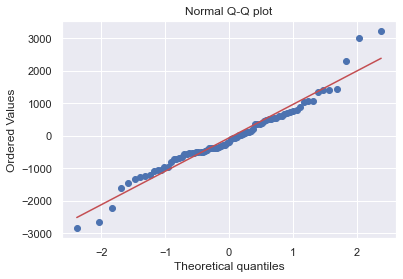

In [155]:
from scipy import stats
stats.probplot(lasso_resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

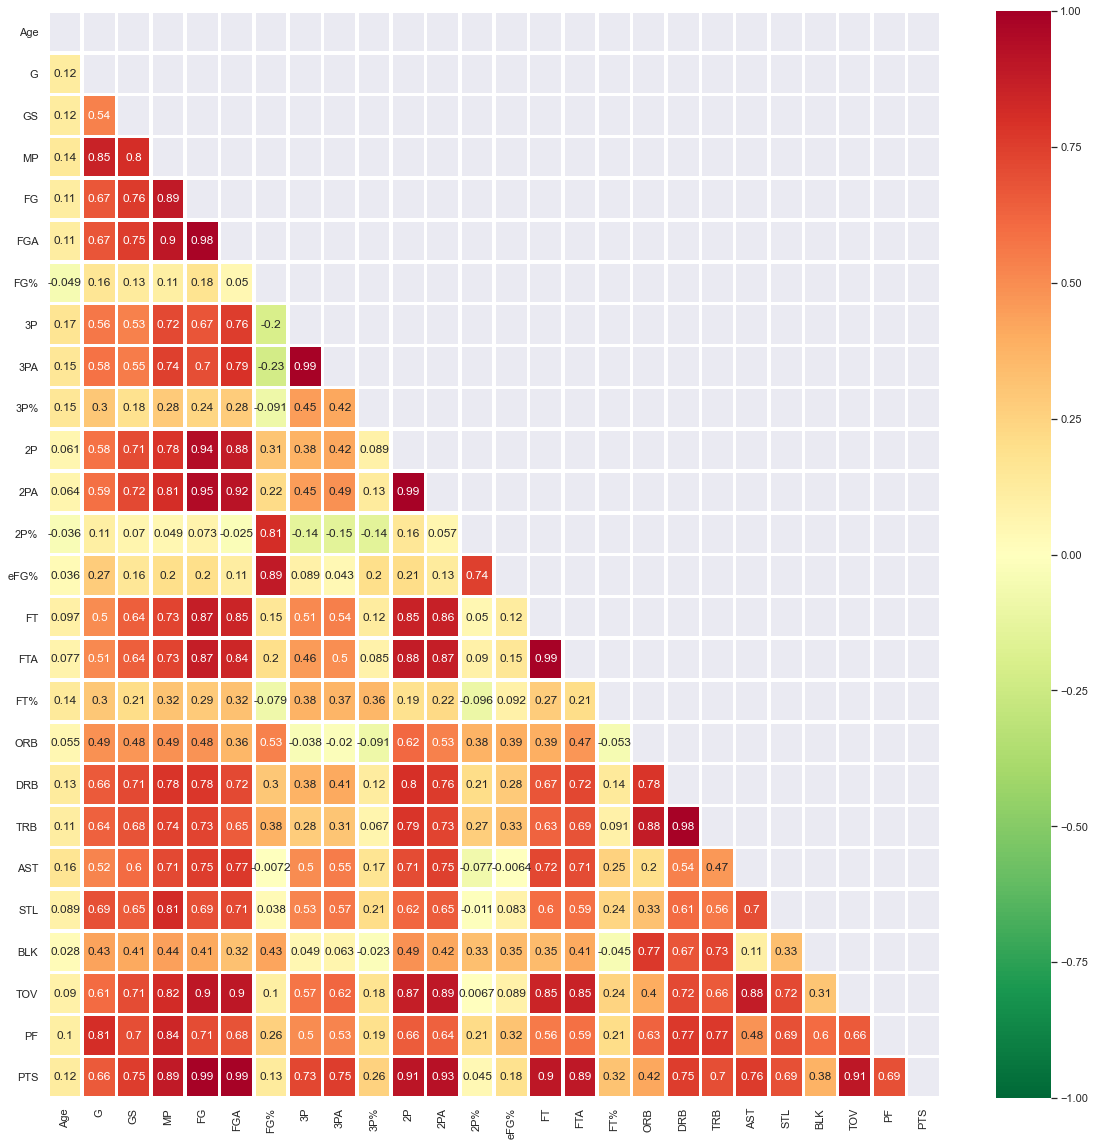

In [154]:
# check multi-collinearity

corr_df=(X.corr(method='pearson'))
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr_df,cmap='RdYlGn_r',annot=True,vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig('multicolin1.png', dpi=300, bbox_inches='tight')
plt.show()

